# Vision models for image interpretation
Some models support image input and can interpret the images. This might be useful to guide the large language model when deciding what to do with the image.

In [1]:
from bia_bob import bob
bob.initialize(model="claude-3-opus-20240229", vision_model="claude-3-opus-20240229")
#bob.initialize(model="gpt-4o-2024-05-13", vision_model="gpt-4o-2024-05-13")
#bob.initialize(model="gemini-1.5-pro-latest", vision_model="gemini-1.5-pro-latest")

First, we load an example image.

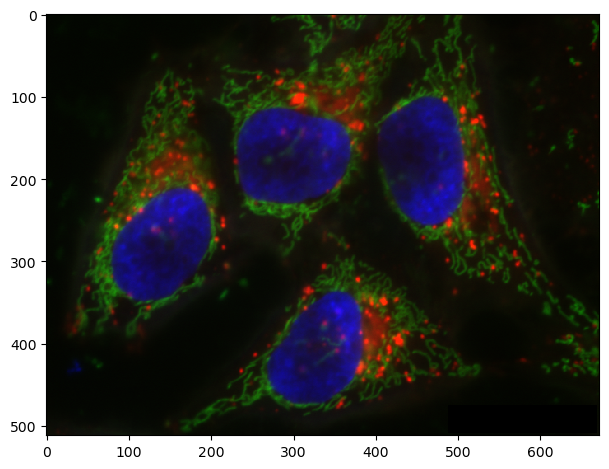

In [2]:
from skimage.io import imread, imshow
image = imread("hela-cells-8bit.tif")

imshow(image)

We can use vision capabilities by passing the image like this:

In [3]:
%%bob image
what's in this microscopy image? Answer in one short sentence.

The microscopy image shows several round blue and red fluorescently labeled cells.

This serves as as sanity check if the information about the image content has been stored in memory:

In [4]:
%bob what's again in the image ?

There was an issue. Retrying (1/3)...


The microscopy image shows several round blue and red fluorescently labeled cells.

In [5]:
%bob how could I segment the nuclei ?

To segment the nuclei in the fluorescence microscopy image, I will apply a combination of Gaussian blurring, Otsu thresholding, and connected component labeling.



In [10]:
from pyclesperanto_prototype import gaussian_blur, threshold_otsu, connected_components_labeling_box

# Apply Gaussian blur to the image
blurred = gaussian_blur(image[...,2], sigma_x=2, sigma_y=2) # modified by human

# Threshold the blurred image using Otsu's method
binary = threshold_otsu(blurred)

# Label connected components (nuclei) in the binary image
labeled_nuclei = connected_components_labeling_box(binary)


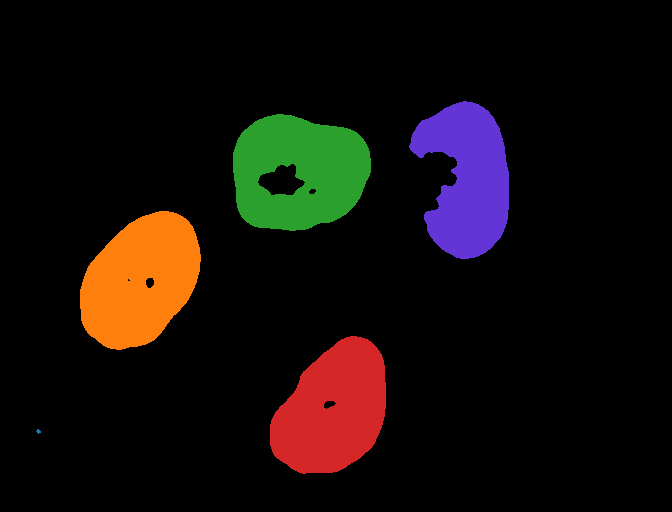

In [11]:
import stackview
stackview.animate_curtain(image, labeled_nuclei)